# Описание проекта

**Цель проекта**

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1. Без подписки
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - Стоимость старта (начала поездки) — 50 рублей;
2. С подпиской Ultra
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.

**Описание данных**

Пользователи — users_go.csv

- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)

Поездки — rides_go.csv

- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

Подписки — subscriptions_go.csv

- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

# Шаг 1. Загрузка данных

Импорт необходимых библиотек

In [95]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Чтение данных и присвоение в переменные

In [96]:
data_user = pd.read_csv('users_go.csv')
data_rides = pd.read_csv('rides_go.csv')
data_subscription = pd.read_csv('subscriptions_go.csv')

In [97]:
print('Вывод данных о Пользователях')
display(data_user.head(2))
print('Вывод данных о Поездках')
display(data_rides.head(2))
print('Вывод данных о Подписках')
display(data_subscription.head(5))

Вывод данных о Пользователях


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra


Вывод данных о Поездках


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18


Вывод данных о Подписках


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [98]:
print('Вывод информации о Пользователях')
data_user.info()

Вывод информации о Пользователях
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [99]:
print('Вывод информации о Поездках')
data_rides.info()

Вывод информации о Поездках
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [100]:
print('Вывод информации о Подписках')
data_subscription.info()

Вывод информации о Подписках
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод**

- Для данных о Пользователях - 1565 строк

- Для данных о Поездках - 18064 строк
    - для колонки date необходимо изменить тип поля
    
- Для данных о Подписках - 2 строки


# Шаг 2. Предобработка данных

2.1 Приведение к типу данных

In [101]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [102]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


2.2 Добавление нового столбца

In [103]:
data_rides['month'] = data_rides['date'].dt.month
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


2.3 Проверка на дубликаты

In [104]:
print('ДУБЛИ в данных о Пользователях:', data_user['user_id'].duplicated().sum())
print('ДУБЛИ в данных о Поездках:', data_rides.duplicated().sum())
print('ДУБЛИ в данных о Подписках:', data_subscription.duplicated().sum())


ДУБЛИ в данных о Пользователях: 31
ДУБЛИ в данных о Поездках: 0
ДУБЛИ в данных о Подписках: 0


In [105]:
data_user = data_user.drop_duplicates().reset_index(drop=True)
print('ДУБЛИ в данных о Пользователях:', data_user['user_id'].duplicated().sum())

ДУБЛИ в данных о Пользователях: 0


# Шаг 3. Исследовательский анализ данных

3.1 Частота встречаемости городов

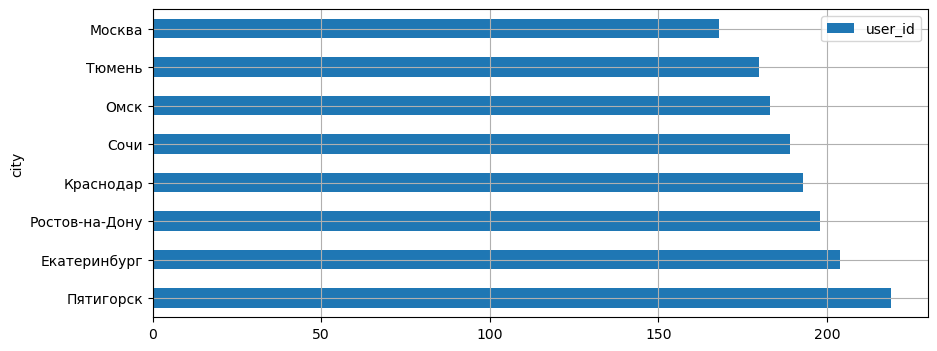

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

In [106]:
(data_user
 .pivot_table(index='city', values='user_id', aggfunc='count')
 .sort_values(by='user_id',ascending=False)
 .plot(grid=True,kind='barh', figsize=(10, 4))
)
plt.show()
data_user['city'].describe()

3.2 Соотношение пользователей с подпиской и без подписки

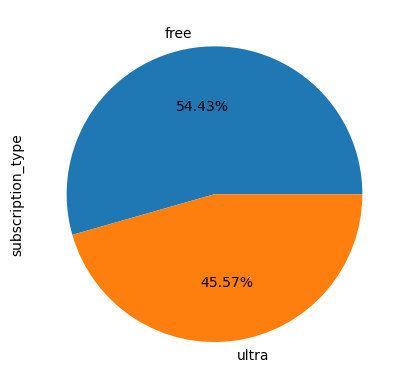

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

In [107]:
(data_user['subscription_type']
 .value_counts()
 .plot(kind='pie',autopct="%0.2f%%")
)
plt.show()
data_user['subscription_type'].describe()

3.3 Возраст пользователей

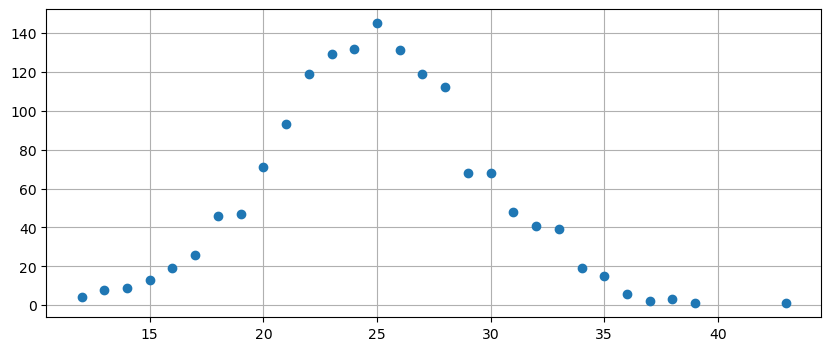

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [116]:

(data_user['age']
 .value_counts()
 .plot(grid=True,style='o', figsize=(10, 4))
)
plt.show()
data_user['age'].describe()

3.4 Расстояние, которое пользователь преодолел за одну поездку

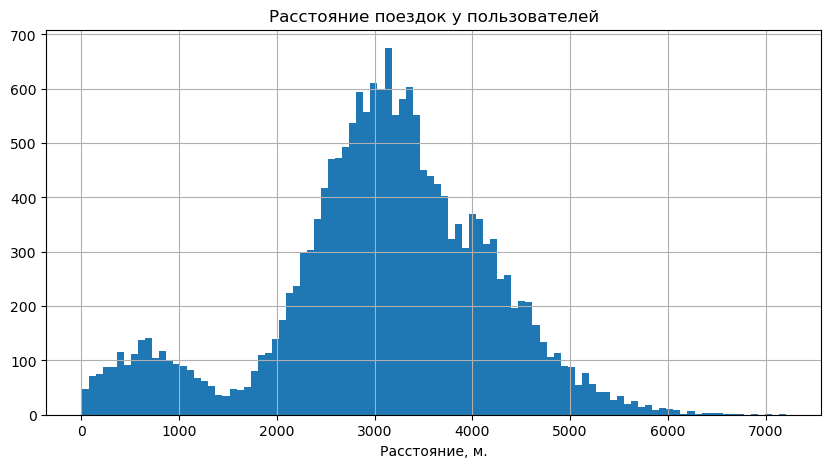

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [118]:
data_rides['distance'].hist(bins=100, figsize = (10,5))
plt.title('Расстояние поездок пользователей');
plt.xlabel('Расстояние, м.');
plt.show()

data_rides['distance'].describe()

3.5 Продолжительность поездок

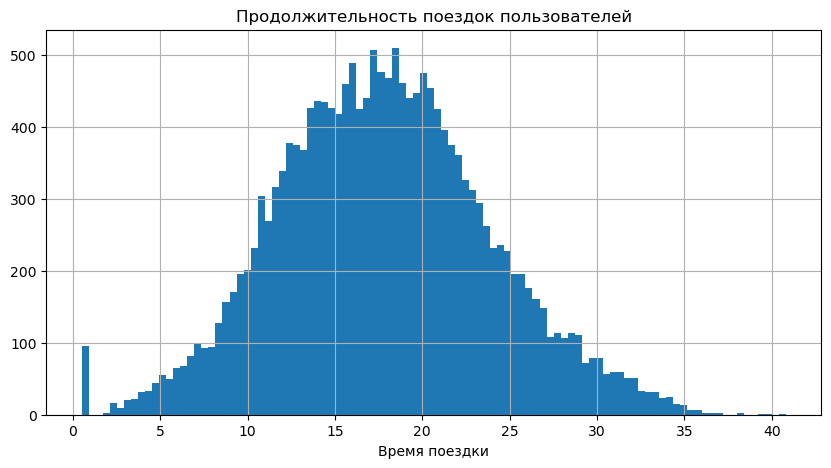

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [119]:
data_rides['duration'].hist(bins=100, figsize = (10,5))
plt.title('Продолжительность поездок пользователей');
plt.xlabel('Время поездки');
plt.show()

data_rides['duration'].describe()

# Шаг 4. Объединение данных

4.1 Объединение данных о пользователях, поездках и подписках в один датафрейм

In [120]:
summary_data = data_user.merge(data_rides, on='user_id', how='left')


In [121]:
summary_data = summary_data.merge(data_subscription, on='subscription_type', how='left')

In [123]:
display(summary_data.head(5))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [124]:
summary_data.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,24.893071,3070.659976,17.805011,6.486772,7.280496,32.012398,71.590658
std,434.734317,4.582216,1116.831209,6.091051,3.437410,0.959882,23.997045,95.508238
min,1.000000,12.000000,0.855683,0.500000,1.000000,6.000000,0.000000,0.000000
25%,487.000000,22.000000,2543.226360,13.597563,4.000000,6.000000,0.000000,0.000000
50%,889.000000,25.000000,3133.609994,17.678395,6.000000,8.000000,50.000000,0.000000
75%,1213.250000,28.000000,3776.222735,21.724800,9.000000,8.000000,50.000000,199.000000
max,1534.000000,43.000000,7211.007745,40.823963,12.000000,8.000000,50.000000,199.000000


4.2 Создадим два датафрейма

4.2.1 Пользователи без подписки

In [126]:
user_not_subscription = summary_data.loc[summary_data['subscription_type'] == 'free']

4.2.2 Пользователи без подписки

In [128]:
user_is_a_subscription = summary_data.loc[summary_data['subscription_type'] == 'ultra']

4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий